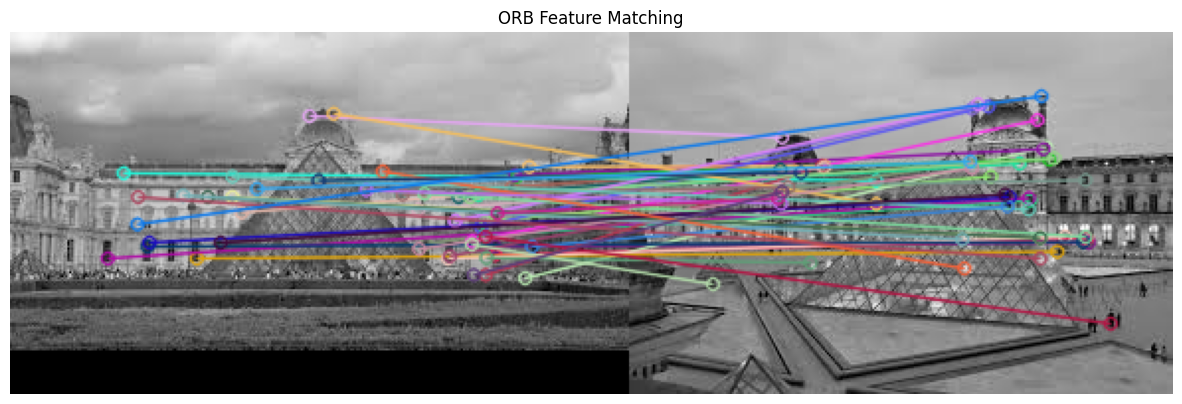

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load two grayscale images
img1 = cv2.imread('surf1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('surf2.jpg', cv2.IMREAD_GRAYSCALE)

# Check if images are loaded correctly
if img1 is None or img2 is None:
    print("Error loading images!")
else:
    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Create BFMatcher and match descriptors
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches by distance (best ones first)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw top N matches
    result = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Show the result
    plt.figure(figsize=(15, 7))
    plt.imshow(result)
    plt.title("ORB Feature Matching")
    plt.axis("off")
    plt.show()
